In [1]:
from select_folders import FolderSelector

In [2]:
folder_selector = FolderSelector()
folder_selector.afficher()
C:/Users/rafae/Documents/GitHub/DS_COVID/data/raw/COVID-19_Radiography_Dataset/COVID-19_Radiography_Dataset/
COVID
Normal
Lung_Opacity
Viral Pneumonia
images
masks

In [3]:
print(folder_selector)

JE COMMENCE PAR UTILISER L'UTILITAIRE DE KERAS.UTILS

In [2]:
import os
import cv2

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from PIL import Image

In [3]:


base_dir = "C:/Users/rafae/Documents/GitHub/DS_COVID/data/raw/COVID-19_Radiography_Dataset/COVID-19_Radiography_Dataset/"
classes = ["COVID", "Normal", "Lung_Opacity", "Viral Pneumonia"]

dico = {}

for cls in classes:
    
    modes_img, formats_img, sizes_img, names_img = [], [], [], []
    modes_msk, formats_msk, sizes_msk, names_msk = [], [], [], []
    images_dir = os.path.join(base_dir, cls, "images")
    masks_dir = os.path.join(base_dir, cls, "masks")
    output_dir = os.path.join(base_dir, cls, "images_masked")

    os.makedirs(output_dir, exist_ok=True)

    for img_name in os.listdir(images_dir):

        
        img_path = os.path.join(images_dir, img_name)
        mask_path = os.path.join(masks_dir, img_name)

        try:
            im = Image.open(img_path)
            modes_img.append(im.mode)
            formats_img.append(im.format)
            sizes_img.append(im.size)
            names_img.append(img_name)

        except Exception as e:
            print(f"Erreur avec {img_path}: {e}")

        try:
            msk = Image.open(mask_path)
            modes_msk.append(msk.mode)
            formats_msk.append(msk.format)
            sizes_msk.append(msk.size)

        except Exception as e:
            print(f"Erreur avec {mask_path}: {e}")

    data = pd.DataFrame({
        'name_img': names_img,
        'mode_img': modes_img,
        'mode_msk': modes_msk,
        'format_img': formats_img,
        'format_msk': formats_msk,
        'size_img': sizes_img,
        'size_msk': sizes_msk

    })
    dico[cls] = data




In [4]:
dico.keys()

dict_keys(['COVID', 'Normal', 'Lung_Opacity', 'Viral Pneumonia'])

#### 1. COVID

In [5]:
for cls in classes :

    print(f"Classe: {cls}")

    df = dico[cls]

    df["id"] = df["name_img"].str.extract(r'(\d+)').astype(int)

    # df = df.drop(columns=["name_img"])

    df = df.sort_values(by='id')

    df = df.set_index("id", drop=True)

    df.info()

    display(df.head())

    print(f"Nombre d'images pour la classe {cls}: {len(df)}")
    print(f"Les images sont de type: {df['mode_img'].unique()}")
    print(f"Les masques sont de type: {df['mode_msk'].unique()}")
    print(f"Les formats des images sont: {df['format_img'].unique()}")
    print(f"Les formats des masques sont: {df['format_msk'].unique()}")
    print(f"Taille des images: {df['size_img'].unique()}")
    print(f"Taille des masques: {df['size_msk'].unique()}")

    print("\n")

Classe: COVID
<class 'pandas.core.frame.DataFrame'>
Index: 3616 entries, 1 to 3616
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   name_img    3616 non-null   object
 1   mode_img    3616 non-null   object
 2   mode_msk    3616 non-null   object
 3   format_img  3616 non-null   object
 4   format_msk  3616 non-null   object
 5   size_img    3616 non-null   object
 6   size_msk    3616 non-null   object
dtypes: object(7)
memory usage: 226.0+ KB


,name_img,mode_img,mode_msk,format_img,format_msk,size_img,size_msk
id,,,,,,,
1,COVID-1.png,L,RGB,PNG,PNG,"(299, 299)","(256, 256)"
2,COVID-2.png,L,RGB,PNG,PNG,"(299, 299)","(256, 256)"
3,COVID-3.png,L,RGB,PNG,PNG,"(299, 299)","(256, 256)"
4,COVID-4.png,L,RGB,PNG,PNG,"(299, 299)","(256, 256)"
5,COVID-5.png,L,RGB,PNG,PNG,"(299, 299)","(256, 256)"


Nombre d'images pour la classe COVID: 3616
Les images sont de type: ['L']
Les masques sont de type: ['RGB']
Les formats des images sont: ['PNG']
Les formats des masques sont: ['PNG']
Taille des images: [(299, 299)]
Taille des masques: [(256, 256)]


Classe: Normal
<class 'pandas.core.frame.DataFrame'>
Index: 10192 entries, 1 to 10192
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   name_img    10192 non-null  object
 1   mode_img    10192 non-null  object
 2   mode_msk    10192 non-null  object
 3   format_img  10192 non-null  object
 4   format_msk  10192 non-null  object
 5   size_img    10192 non-null  object
 6   size_msk    10192 non-null  object
dtypes: object(7)
memory usage: 637.0+ KB


,name_img,mode_img,mode_msk,format_img,format_msk,size_img,size_msk
id,,,,,,,
1,Normal-1.png,L,RGB,PNG,PNG,"(299, 299)","(256, 256)"
2,Normal-2.png,L,RGB,PNG,PNG,"(299, 299)","(256, 256)"
3,Normal-3.png,L,RGB,PNG,PNG,"(299, 299)","(256, 256)"
4,Normal-4.png,L,RGB,PNG,PNG,"(299, 299)","(256, 256)"
5,Normal-5.png,L,RGB,PNG,PNG,"(299, 299)","(256, 256)"


Nombre d'images pour la classe Normal: 10192
Les images sont de type: ['L']
Les masques sont de type: ['RGB']
Les formats des images sont: ['PNG']
Les formats des masques sont: ['PNG']
Taille des images: [(299, 299)]
Taille des masques: [(256, 256)]


Classe: Lung_Opacity
<class 'pandas.core.frame.DataFrame'>
Index: 6012 entries, 1 to 6012
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   name_img    6012 non-null   object
 1   mode_img    6012 non-null   object
 2   mode_msk    6012 non-null   object
 3   format_img  6012 non-null   object
 4   format_msk  6012 non-null   object
 5   size_img    6012 non-null   object
 6   size_msk    6012 non-null   object
dtypes: object(7)
memory usage: 375.8+ KB


,name_img,mode_img,mode_msk,format_img,format_msk,size_img,size_msk
id,,,,,,,
1,Lung_Opacity-1.png,L,RGB,PNG,PNG,"(299, 299)","(256, 256)"
2,Lung_Opacity-2.png,L,RGB,PNG,PNG,"(299, 299)","(256, 256)"
3,Lung_Opacity-3.png,L,RGB,PNG,PNG,"(299, 299)","(256, 256)"
4,Lung_Opacity-4.png,L,RGB,PNG,PNG,"(299, 299)","(256, 256)"
5,Lung_Opacity-5.png,L,RGB,PNG,PNG,"(299, 299)","(256, 256)"


Nombre d'images pour la classe Lung_Opacity: 6012
Les images sont de type: ['L']
Les masques sont de type: ['RGB']
Les formats des images sont: ['PNG']
Les formats des masques sont: ['PNG']
Taille des images: [(299, 299)]
Taille des masques: [(256, 256)]


Classe: Viral Pneumonia
<class 'pandas.core.frame.DataFrame'>
Index: 1345 entries, 1 to 1345
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   name_img    1345 non-null   object
 1   mode_img    1345 non-null   object
 2   mode_msk    1345 non-null   object
 3   format_img  1345 non-null   object
 4   format_msk  1345 non-null   object
 5   size_img    1345 non-null   object
 6   size_msk    1345 non-null   object
dtypes: object(7)
memory usage: 84.1+ KB


,name_img,mode_img,mode_msk,format_img,format_msk,size_img,size_msk
id,,,,,,,
1,Viral Pneumonia-1.png,L,RGB,PNG,PNG,"(299, 299)","(256, 256)"
2,Viral Pneumonia-2.png,L,RGB,PNG,PNG,"(299, 299)","(256, 256)"
3,Viral Pneumonia-3.png,L,RGB,PNG,PNG,"(299, 299)","(256, 256)"
4,Viral Pneumonia-4.png,L,RGB,PNG,PNG,"(299, 299)","(256, 256)"
5,Viral Pneumonia-5.png,L,RGB,PNG,PNG,"(299, 299)","(256, 256)"


Nombre d'images pour la classe Viral Pneumonia: 1345
Les images sont de type: ['L' 'RGB']
Les masques sont de type: ['RGB']
Les formats des images sont: ['PNG']
Les formats des masques sont: ['PNG']
Taille des images: [(299, 299)]
Taille des masques: [(256, 256)]




On remarque que le problème est en effet avec les images de 'Viral Pneumonia'

In [6]:
cls = "Viral Pneumonia"

df_vp = dico["Viral Pneumonia"]

df_vp["id"] = df_vp["name_img"].str.extract(r'(\d+)').astype(int)

# df_vp = df_vp.drop(columns=["name_img"])

df_vp = df_vp.sort_values(by='id')

df_vp = df_vp.set_index("id", drop=True)

intrus = df_vp[df_vp['mode_img'] != 'L'].index # Les images qui ne sont pas en mode 'L' (niveau de gris)

print(len(intrus), "intrus trouvés dans la classe 'Viral Pneumonia'")

# On vérifie si ce sont des vraies images RGB (i.e. 3 canaux) :

for intrus_id in intrus[:5]:
    img_name = df_vp.loc[intrus_id, 'name_img']
    img_path = os.path.join(base_dir, cls, "images", img_name)
    
    try:
        im = Image.open(img_path)
        img_array = np.array(im)   
        #img_array.shape = im.size[1], im.size[0], 1  # Assurer que l'image est en RGB
        if img_array.ndim > 1 :
           
            first_channel = img_array[:, :, 0]
            second_channel = img_array[:, :, 1]
            third_channel = img_array[:, :, 2]

            print(f"Image {img_name} \n \n - Canaux : premier {first_channel}, \n \n second {second_channel}, \n \n troisième {third_channel}")
        


    except Exception as e:
        print(f"Erreur avec l'image {img_name}: {e}")


140 intrus trouvés dans la classe 'Viral Pneumonia'
Image Viral Pneumonia-140.png 
 
 - Canaux : premier [[167 153 154 ... 119 116 115]
 [161 151 152 ... 118 118 117]
 [156 149 151 ... 117 117 116]
 ...
 [100 101 104 ...  32  17   1]
 [ 97  99 103 ...  34  20   2]
 [ 97  99 103 ...  34  20   2]], 
 
 second [[167 153 154 ... 119 116 115]
 [161 151 152 ... 118 118 117]
 [156 149 151 ... 117 117 116]
 ...
 [100 101 104 ...  32  17   1]
 [ 97  99 103 ...  34  20   2]
 [ 97  99 103 ...  34  20   2]], 
 
 troisième [[167 153 154 ... 119 116 115]
 [161 151 152 ... 118 118 117]
 [156 149 151 ... 117 117 116]
 ...
 [100 101 104 ...  32  17   1]
 [ 97  99 103 ...  34  20   2]
 [ 97  99 103 ...  34  20   2]]
Image Viral Pneumonia-142.png 
 
 - Canaux : premier [[66 63 63 ... 58 58 57]
 [63 60 60 ... 58 58 58]
 [58 55 56 ... 58 58 59]
 ...
 [32 32 31 ... 31 32 32]
 [32 32 31 ... 31 32 32]
 [32 32 31 ... 31 32 32]], 
 
 second [[66 63 63 ... 58 58 57]
 [63 60 60 ... 58 58 58]
 [58 55 56 ... 58 58 

In [7]:
img_array

array([[[80, 80, 80],
        [80, 80, 80],
        [64, 64, 64],
        ...,
        [81, 81, 81],
        [78, 78, 78],
        [77, 77, 77]],

       [[77, 77, 77],
        [73, 73, 73],
        [57, 57, 57],
        ...,
        [81, 81, 81],
        [78, 78, 78],
        [77, 77, 77]],

       [[74, 74, 74],
        [63, 63, 63],
        [50, 50, 50],
        ...,
        [80, 80, 80],
        [78, 78, 78],
        [77, 77, 77]],

       ...,

       [[13, 13, 13],
        [12, 12, 12],
        [ 9,  9,  9],
        ...,
        [11, 11, 11],
        [14, 14, 14],
        [15, 15, 15]],

       [[12, 12, 12],
        [11, 11, 11],
        [ 8,  8,  8],
        ...,
        [12, 12, 12],
        [15, 15, 15],
        [16, 16, 16]],

       [[12, 12, 12],
        [11, 11, 11],
        [ 8,  8,  8],
        ...,
        [12, 12, 12],
        [15, 15, 15],
        [16, 16, 16]]], dtype=uint8)

In [8]:
(img_array[:,:,1] == img_array[:,:,2]).sum()

np.int64(89401)

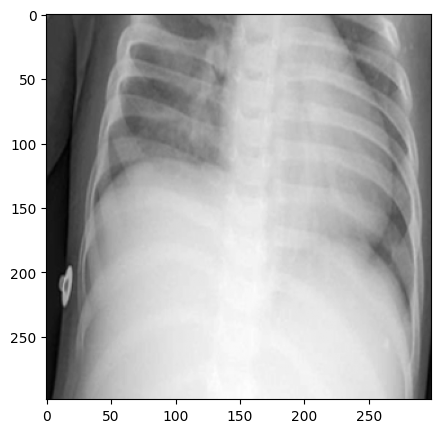

In [9]:
plt.figure(figsize=(10, 5))
plt.imshow(img_array[:,:,0], cmap = 'gray')
plt.show()

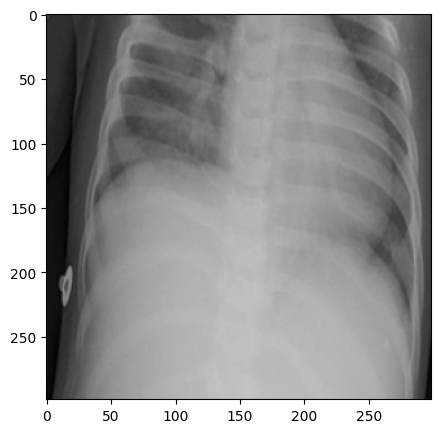

In [10]:
plt.figure(figsize=(10, 5))
plt.imshow(img_array)
plt.show()

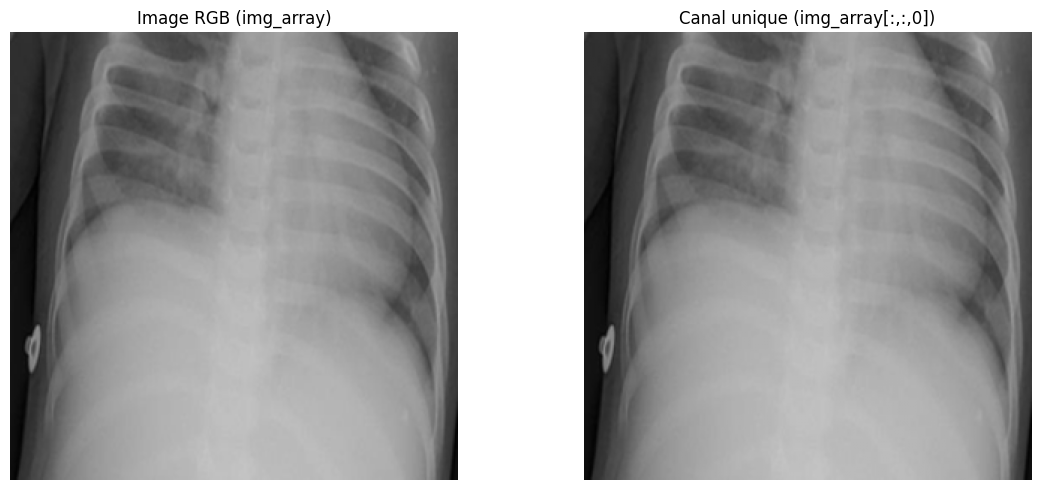

In [12]:

plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
plt.imshow(img_array)
plt.title('Image RGB (img_array)')
plt.axis('off')

plt.subplot(1, 2, 2)
plt.imshow(img_array[:, :, 0], cmap='gray', vmin=0, vmax=255)
plt.title('Canal unique (img_array[:,:,0])')
plt.axis('off')

plt.tight_layout()
plt.show()

In [ ]:


base_dir = "C:/Users/rafae/Documents/GitHub/DS_COVID/data/raw/COVID-19_Radiography_Dataset/COVID-19_Radiography_Dataset/"
classes = ["COVID", "Normal", "Lung_Opacity", "Viral Pneumonia"]

dico = {}

for cls in classes:
    
    images_dir = os.path.join(base_dir, cls, "images")
    masks_dir = os.path.join(base_dir, cls, "masks")
    output_dir = os.path.join(base_dir, cls, "images_masked")

    os.makedirs(output_dir, exist_ok=True)

    for img_name in os.listdir(images_dir):

        
        img_path = os.path.join(images_dir, img_name)
        mask_path = os.path.join(masks_dir, img_name)

        try:
            im = Image.open(img_path)
            modes_img.append(im.mode)

        except Exception as e:
            print(f"Erreur avec {img_path}: {e}")

        try:
            msk = Image.open(mask_path)

        except Exception as e:
            print(f"Erreur avec {mask_path}: {e}")

        # On vérifie si l'image est en mode 'L' (niveau de gris)
        if im.mode == 'L':
            # On applique le masque
            masked_image = Image.composite(im, Image.new('L', im.size), msk)
            masked_image.save(os.path.join(output_dir, img_name))




In [13]:
def are_channels_identical(img_array):
    """
    Vérifie si les 3 canaux d'une image (array HxWx3) sont identiques.
    Retourne True si oui, False sinon.
    """
    if img_array.ndim != 3 or img_array.shape[2] != 3:
        raise ValueError("L'image doit avoir 3 canaux (HxWx3)")
    return np.all(img_array[:,:,0] == img_array[:,:,1]) and np.all(img_array[:,:,0] == img_array[:,:,2])

In [ ]:


base_dir = "C:/Users/rafae/Documents/GitHub/DS_COVID/data/raw/COVID-19_Radiography_Dataset/COVID-19_Radiography_Dataset/"
classes = ["COVID", "Normal", "Lung_Opacity", "Viral Pneumonia"]

nb_false_rgb_img = 0
nb_false_rgb_msk = 0


for cls in classes:
    
    images_dir = os.path.join(base_dir, cls, "images")
    masks_dir = os.path.join(base_dir, cls, "masks")
    output_dir = os.path.join(base_dir, cls, "images_masked")

    os.makedirs(output_dir, exist_ok=True)

    for img_name in os.listdir(images_dir):

        msk_name = img_name
        img_path = os.path.join(images_dir, img_name)
        mask_path = os.path.join(masks_dir, msk_name)

        try:
            im = Image.open(img_path)

        except Exception as e:
            print(f"Erreur avec {img_path}: {e}")

        try:
            msk = Image.open(mask_path)

        except Exception as e:
            print(f"Erreur avec {mask_path}: {e}")

        # On vérifie si l'image est en mode 'RGB' 

        if im.mode == 'RGB':
            
            img_array = np.array(im)

            if img_array.ndim == 3 & are_channels_identical(img_array) :

                nb_false_rgb_img += 1


        if msk_array.ndim == 3 & msk.mode == 'RGB':
            
            msk_array = np.array(msk)

            if are_channels_identical(msk_array) :

                nb_false_rgb_msk += 1

    






In [15]:
print(f"Nombre d'images RGB avec des canaux identiques : {nb_false_rgb_img}")
print(f"Nombre de masques RGB avec des canaux identiques : {nb_false_rgb_msk}")

Nombre d'images RGB avec des canaux identiques : 140
Nombre de masques RGB avec des canaux identiques : 21165


In [25]:


base_dir = "C:/Users/rafae/Documents/GitHub/DS_COVID/data/raw/COVID-19_Radiography_Dataset/COVID-19_Radiography_Dataset/"
classes = ["COVID", "Normal", "Lung_Opacity", "Viral Pneumonia"]

nb_false_rgb_img = 0
nb_false_rgb_msk = 0


for cls in classes:
    
    images_dir = os.path.join(base_dir, cls, "images")
    masks_dir = os.path.join(base_dir, cls, "masks")
    output_dir = os.path.join(base_dir, cls, "images_masked")

    os.makedirs(output_dir, exist_ok=True)

    for img_name in os.listdir(images_dir):

        msk_name = img_name
        img_path = os.path.join(images_dir, img_name)
        mask_path = os.path.join(masks_dir, msk_name)

        try:
            im = Image.open(img_path)

        except Exception as e:
            print(f"Erreur avec {img_path}: {e}")

        try:
            msk = Image.open(mask_path)

        except Exception as e:
            print(f"Erreur avec {mask_path}: {e}")

        # On vérifie si l'image est en mode 'RGB' 
        if im.mode == 'RGB':
            
            img_array = np.array(im)

            if img_array.ndim == 3 and img_array.shape[2] == 3 :

                nb_false_rgb_img += 1


        if msk.mode == 'RGB':
            
            msk_array = np.array(msk)

            if msk_array.ndim == 3 and msk_array.shape[2] == 3 :

                nb_false_rgb_msk += 1

    






In [26]:
nb_false_rgb_img, nb_false_rgb_msk

(140, 21165)

In [29]:


base_dir = "C:/Users/rafae/Documents/GitHub/DS_COVID/data/raw/COVID-19_Radiography_Dataset/COVID-19_Radiography_Dataset/"
classes = ["COVID", "Normal", "Lung_Opacity", "Viral Pneumonia"]

nb_false_rgb_img = 0
nb_false_rgb_msk = 0


for cls in classes:
    
    images_dir = os.path.join(base_dir, cls, "images")
    masks_dir = os.path.join(base_dir, cls, "masks")
    output_dir = os.path.join(base_dir, cls, "images_masked")

    os.makedirs(output_dir, exist_ok=True)

    for img_name in os.listdir(images_dir):

        msk_name = img_name
        img_path = os.path.join(images_dir, img_name)
        mask_path = os.path.join(masks_dir, msk_name)

        try:
            im = Image.open(img_path)

        except Exception as e:
            print(f"Erreur avec {img_path}: {e}")

        try:
            msk = Image.open(mask_path)

        except Exception as e:

            print(f"Erreur avec {mask_path}: {e}")

        # On vérifie si l'image est en mode 'RGB' 


        if im.mode == 'RGB':

            img_array_rgb = np.array(im)
            
            img_array_l = img_array_rgb[:,:,0]      # On prend le premier canal, ce qui revient à une conversion en niveau de gris
                                                    # car tous les canaux sont identique

            im_l = Image.fromarray(img_array_l)     # Pour remettre l'image au format PIL

        else :

            im_l = im


        msk_array_rgb = np.array(msk)
        msk_array_l = msk_array_rgb[:,:,0]          # idem
        msk_l = Image.fromarray(msk_array_l)        # idem

        # Redimensionne le masque à la taille souhaitée (256, 256)
        im_l = im_l.resize((256, 256), resample=Image.NEAREST)  # NEAREST pour garder les valeurs binaires

        # Applique le masque à l'image
        masked_image = Image.composite(im_l, Image.new(im_l.mode, im_l.size, 0), msk_l)

        # Sauvegarde ou utilise le masque redimensionné
        masked_image.save(output_dir + '/' + img_name)

# plt.imshow(masked_image, cmap='gray')
# plt.axis('off')

    

In [17]:
a = Image.new(im.mode, im.size, 0)

print(np.array(a))

[[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]
